<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/8_deep_computer_vision_with_tensorflow/3_cnn_architectures_and_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>

# CNN Architectures and Transfer Learning

### Contents 

* [1. Looking Back: A Review on State of the Art CNN Architectures](#1)
* [2. Intro Note - Transfer Learning and using Pretrained Models](#1)
   
* [3. Quick Image Classification on Pretrained Model ](#3)
   * [3.1 Getting Image](#3-1)
   * [3.2 Getting a Pretrained Model](#3-2)
   * [3.3 Perform Classification](#3-3)

* [4. Transfer Learning and FineTuning in Practice](#4)
   * [4.1 Getting Data](#4-1)
   * [4.2 Applying Data Augmentation](#4-2)
   * [4.3 Building a Model with a Pretrained Network](#4-3)
   * [4.4 Training a Model](#4-4)
   * [4.5 Visualizing the Results](#4-5)
   * [4.6 Finetuning a Model](#4-6)
   * [4.7 Visualizing the Results Again](#4-7)

* [5. Image Classification and Transfer Learning with TensorFlow Hub](#5)
   * [5.1 A Quick Classifier with TF Hub ](#5-1)

      * [5.1.1 Getting a Pretrained Model](#5-1-1)
      * [5.1.2 Getting and Preparing an Image](#5-1-2)
      * [5.1.3 Running a Classifier on Image](#5-1-3)
      * [5.1.4 Wrapping up a Hub Model into Keras Layer](#5-1-4)

   * [5.2 Building a Custom Classifier with TF Hub](#5-2)
      * [5.2.1 Getting and Preparing Data](#5-2-1)
      * [5.2.2 Creating a New Model from a Pretrained Model](#5-2-2)
      * [5.2.3 Compiling and Training A New Model](#5-2-3)
      * [5.2.4 Visualizing the Results](#5-2-4)
      * [5.2.5 Test A Model on Internet Images](#5-2-5)
* [6. Further Learning](#6)

<a name='1'></a>

## 1. Looking Back: A Review on State of the Art CNN Architectures

Nearly all of the advances in computer vision have been made since 2010. Before 2010, neural networks and computer vision didn't have momentum they have to day. in October 2012, Andrej Karpathy wrote a great blog about the [state of computer vision and AI](http://karpathy.github.io/2012/10/22/state-of-computer-vision/): `we are really, really far away`.

As of to day, we have seen many successes in vision community, and my hope is that the field keeps emerging. 

What has led to the successes we have to day? 

If there is one thing that has led to advancements in computer vision is [ImageNet challenge](https://image-net.org/challenges/LSVRC/index.php). This challenge has led to the development of state of the art models in image recognition, object detection and image segmentation. To day, All of these vision models are running on top of many intelligent applications such as web & image searches and [self driving cars](https://www.youtube.com/watch?v=CerTu2-FzFw). 

Here is a review on some of the state of the art CNN Architectures: 

#### First Famous CNN Architecture: LeNet-5

[LeNet-5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) was one of the first CNN architecture. It was designed by Yann Lecunn in November 1998(I was 4 months old at the time :). It was specifally designed for handwritten and machine-printed character recognition. 

LeNet-5 may not be the widely used CNN architecture to day, but the development of later and more powerful architectures were built on top of LeNet-5. An example of architecture that is kind of similar to LeNet-5 is [AlexNet](https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html) which won the 2012 ImageNet challenge. 

Here is a great LeNet-5 [Demo](http://yann.lecun.com/exdb/lenet/index.html)


Below are more CNN architectures and links to their papers that are worth reading. 

* [AlexNet: ImageNet Classification with Deep Convolutional Neural Networks](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)(Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton)
* [VGGNet(Visual Geometry Group): Very Deep CNN for Large Scale Image Recognition](https://arxiv.org/pdf/1409.1556.pdf)(Karen Simonyan, Andrew Zisserman, 2015)
* [GoogLeNet: Going Deeper with Convolutions](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Szegedy_Going_Deeper_With_2015_CVPR_paper.pdf)
* [ResNet: Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)
* [ Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/abs/1610.02357)(Francois Chollet, 2016)



<a name='2'></a>

## 2. Intro Note - Transfer Learning and Pretrained Models

Transfer learning is a technique used in machine learning in which a model developed to perform a given task is used for another similar task.

Tranfer learning is very useful technique in case you have small dataset and less compute power. It allows you to leverage pretrained and open source models, you only have to tweak them a bit to match it with the problem at hand. 

Here is a typical flow of transfer learning:

* Initializing the primary model (often a pretrained model) and weights
* Freezing the layers of the primary model
* Creating the new model and add new trainable dense layers on top of the primary model. 
* Training the new model
* Evaluating, and improving (or finetuning) the new model. 

Keras and TensorFlow have a whole range of pretrained models that can be used in a matter of minutes. It takes one line of code to download VGGNet into your code, and it takes few more codes to start making predictions on new images. All without having to build a model or train it. 

```
pretrained_model = tensorflow.keras.applications.VGG16(weights='imagenet', include_top=False)
```
There are a whole ranges of ready to use models, either from [Keras Applications](https://keras.io/api/applications/), and [TensorFlow Hub](https://tfhub.dev). In the later practice sections, we will use pretrained models from all of them. 

Below is a table of available CNN architectures and their weights on ImageNet dataset. 




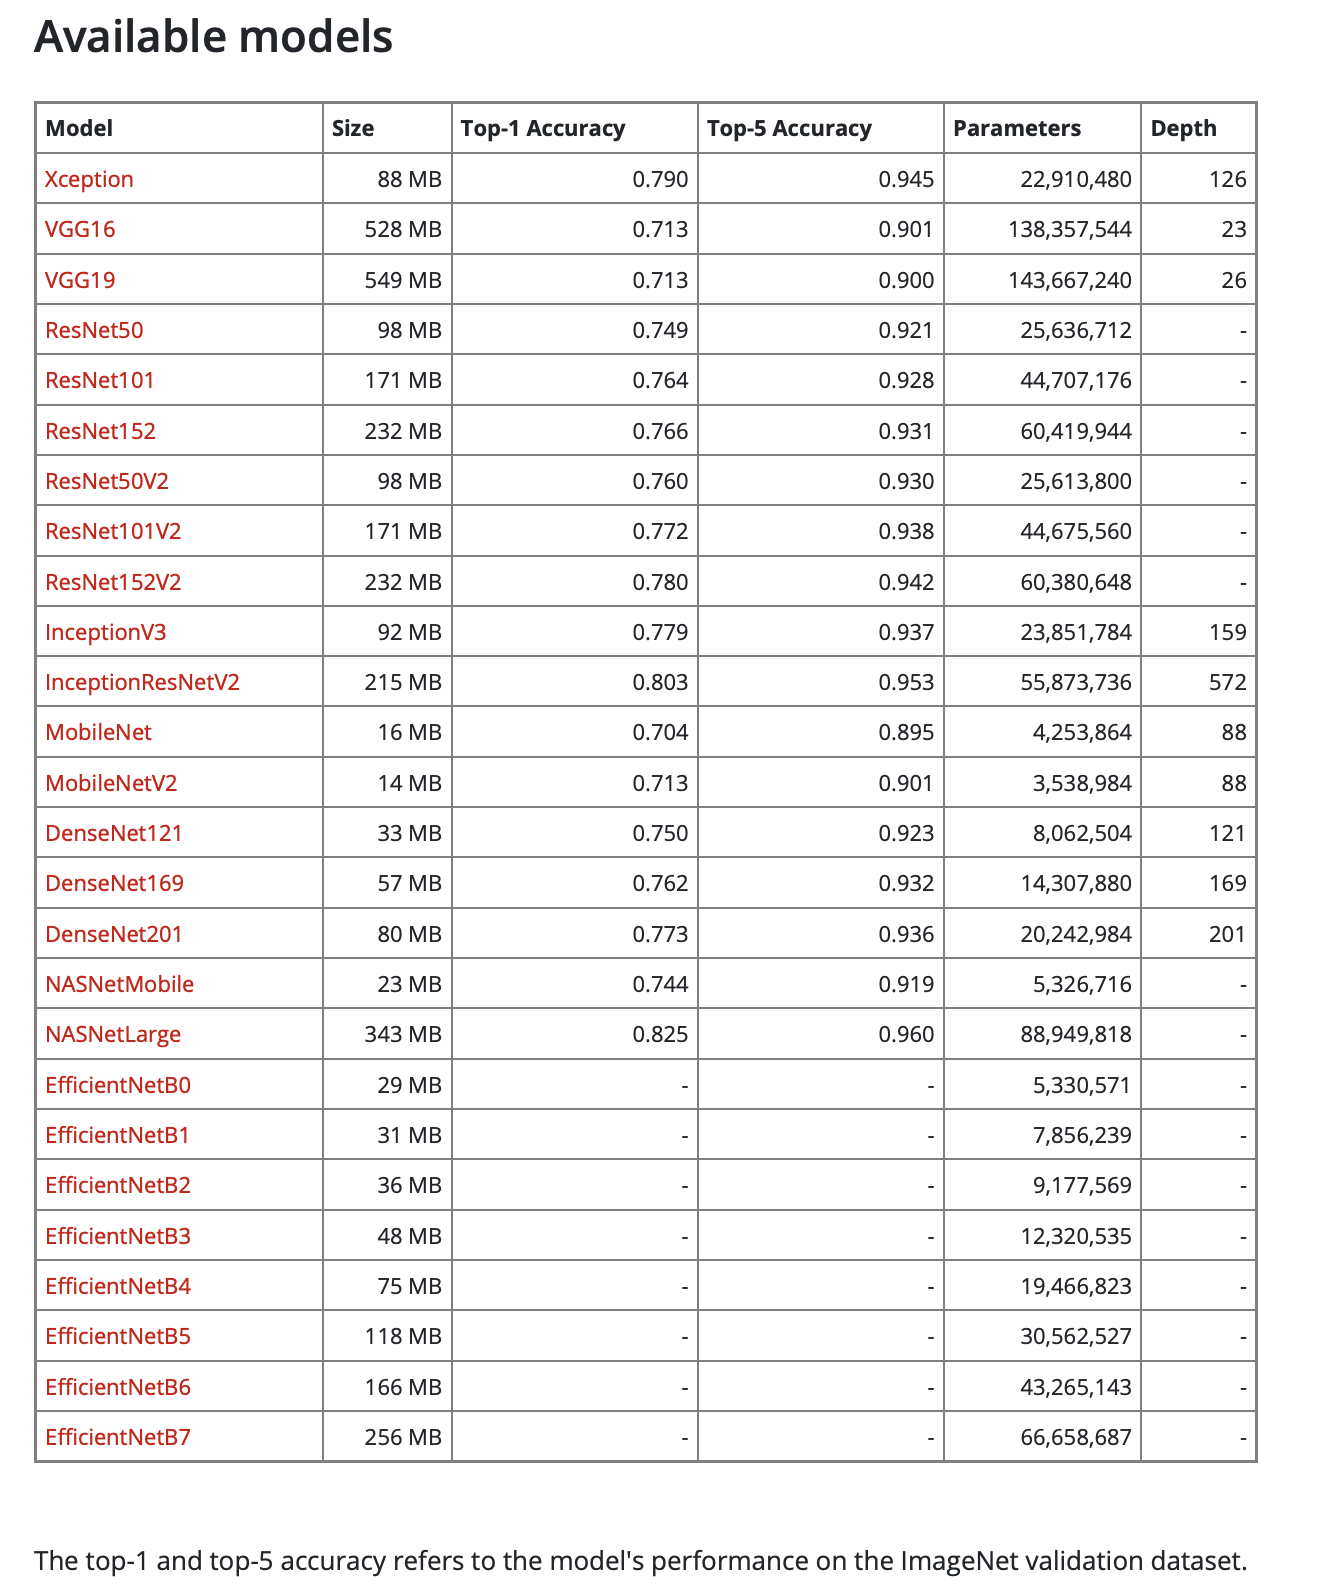

Source: [Keras.io](https://keras.io/api/applications/)

<a name='3'></a>

## 3. A Quick Image Classification on Pretrained Model

One of the advantage of using pretrained models is that you can use them to classify images on fly. 

Let's use [ResNet50](https://arxiv.org/abs/1512.03385) to perform image classification. But we will first get the image and preprocess it. 

<a name='3-1'></a>

## 3.1 A Getting the Image

#### Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
# The image is airplane

def get_preprocess_image(im_name, im_url):

  image = get_file(im_name, im_url)
  image = load_img(image, target_size=(224,224))
  image = img_to_array(image)
  image = tf.expand_dims(image, 0)

  # Preprocess the image with preprocess_input function

  image = preprocess_input(image)

  return image

In [ ]:
# Getting the image

im_url = 'https://upload.wikimedia.org/wikipedia/commons/a/ac/Germanwings%2C_Tegel_Airport%2C_Berlin_%28IMG_9075%29.jpg'

airplane_image = get_preprocess_image('airplane', im_url)

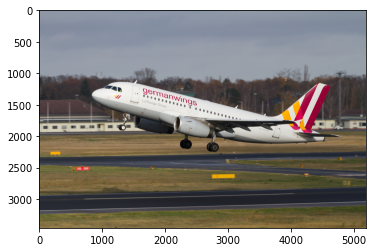

In [ ]:
# Plotting image
plt.imshow(load_img(get_file('air',im_url)))

<a name='3-2'></a>

## 3.2 Getting a Pretrained Model

We are going load `ResNet50` from `keras.applications.` How cool is it that you can just download a big trained model in a matter of seconds!

We will load it with the imagenet weights. That way, it is trained. 

In [ ]:
# Getting a pretrained model

from tensorflow.keras.applications.resnet50 import ResNet50

resnet = ResNet50(weights='imagenet')

<a name='3-3'></a>

## 3.3 Performing classification

Classifying an image using a pretrained model is easy as saying it. 

It will take some minutes.

In [ ]:
predictions = resnet.predict(airplane_image)

Now, let's use `decode_predictions` function to decode the predictions. It will return a list of tuples of class,  label, and probability.

In [ ]:
from tensorflow.keras.applications.resnet50 import decode_predictions

# Get the top 5 class, label, and probability
preds_decoded = decode_predictions(predictions, top=5)[0]

In [ ]:
# Display predictions
i = 1
for tup in preds_decoded:
  print(f'{i} Predicted Class, Label, Prob: {tup}')
  i +=1

1 Predicted Class, Label, Prob: ('n02690373', 'airliner', 0.9895238)
2 Predicted Class, Label, Prob: ('n04592741', 'wing', 0.009582356)
3 Predicted Class, Label, Prob: ('n04552348', 'warplane', 0.000805219)
4 Predicted Class, Label, Prob: ('n04266014', 'space_shuttle', 5.6901e-05)
5 Predicted Class, Label, Prob: ('n02687172', 'aircraft_carrier', 1.5924476e-05)


This is pretty amazing. The model wasn't very far. The label with high probability is `wing`, next is `pelican`, `airliner`, `warplane` and so forth. We can not blame the model that it detected wing on airplane :)

This was about using pretrained models to perform classification. What if you wanted to reuse some parts of pretrained model (`resnet` for example) on a custom dataset? That's where transfer learning comes into the picture. 

<a name='4'></a>

## 4. Transfer Learning and Finetuning In Practice

Transfer learning is a technique used in machine learning in which a model developed to perform a given task is reused for another similar task.

We will follow this flow while performing transfer learning:

* Initializing the primary model (often a pretrained model) and weights
* Freezing the layers of the primary model
* Creating the new model and add new trainable dense layers on top of the primary model. 
* Training the new model
* Evaluating, and improving (or finetuning) the new model. 

But since we are going to work with our own data, let's get and prepare the data first. 

<a name='4-1'></a>

## 4.1 Getting the Data

In [ ]:
# Download the data into the workspace

import zipfile
import os

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


# Extract the zip file

zip_dir = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(zip_dir, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Get training and val directories

main_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(main_dir, 'train')
val_dir = os.path.join(main_dir, 'validation')

--2021-08-14 08:34:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   189MB/s    in 0.3s    

2021-08-14 08:34:02 (189 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



<a name='4-2'></a>

## 4.2 Applying Data Augmentation

We are going to use `ImageDataGenerator` to generate augmented images. By using `ImageDataGenerator`, we are guarranteed that the model will never see the same image twice. Each image will be transformed into various scenarios in a way that benefits model performance. 


Below are some of the options available in [ImageDataGenerator](https://keras.io/api/preprocessing/image/) and their explainations. 

```
train_imagenerator = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```

* **rotation_range** is a value in degrees (0–180) to randomly rotate images.

* **width_shift and height_shift** are ranges of fraction of total width or height within which to translate pictures, either vertically or horizontally.

* **shear_range** is for applying shearing randomly.

* **zoom_range** is for zooming pictures randomly. 

* **horizontal_flip** is for flipping half of the images horizontally. There is also `vertical_flip` option. 

* **fill_mode** is for completing newly created pixels, which can appear after a rotation or a width/height shift.


See the [documentation](https://keras.io/api/preprocessing/image/), it is an interesting read, and there are more preprocessing functions that you might need in your future projects. 

Let's see this in practice! We will start by creating `train_imagenerator` which is an image generator for training set.


In [ ]:
# Creating training image data generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagenerator = ImageDataGenerator(
    
    rescale=1/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    
)

We will also create `val_imagenerator`, but different to training generator, there are no augmentation. It's only rescaling the images pixels to values between 0 and 1. Images pixels are normally between 0 and 255. 

Rescaling the values improve the performance of the neural network and reduce training time as well. 

In [ ]:
# Validation image generator

val_imagenerator = ImageDataGenerator(rescale=1/255.)

After creating train and validation generators, let's use `image_dataset_from_directory function` to generate a TensorFlow dataset from images files located in our two directories. 

Below is how training and validation directories are structured:

```
cats_dogs_filtered/
..train/
....cats/
......cat.0.jpg
......cat.1.jpg
......cat.2.jpg
....dogs/
......dog.0.jpg
......dog.1.jpg
......dog.2.jpg
..validation/
....cats/
......cat.0.jpg
......cat.1.jpg
....dogs/
......dog.0.jpg
......dog.1.jpg
```

In [ ]:
# Load training images in batches of 20 while applying aumgmentation
train_path = '/tmp/cats_and_dogs_filtered/train'
val_path = '/tmp/cats_and_dogs_filtered/validation'

batch_size = 20
target_size = (180,180)

train_generator = train_imagenerator.flow_from_directory(
        train_path, #parent directory must be specified # or use train_dir
        target_size = target_size, # All images will be resized to (180,180)
        batch_size=batch_size,
        class_mode='binary' # since we need binary labels(0,1) and we will use binary_crossentropy

) 

val_generator = val_imagenerator.flow_from_directory(
        val_path, #parent directory must be specified # or use val_dir
        target_size = target_size, # All images will be resized to (180,180)
        batch_size=batch_size,
        class_mode='binary' # since we need binary labels(0,1) and we will use binary_crossentropy

) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Another great advantage of `ImageDataGenerator` is that it generates the labels of the images based off their folders. During the model training, we won't need to specify the labels.

We are ready to reuse a pretrained model on our dataset, but before we could try to visualize the augmented images.

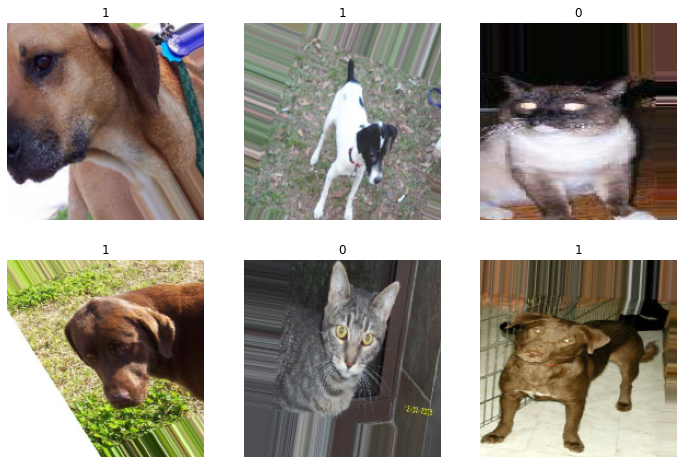

In [ ]:
augmented_image, label = train_generator.next()

plt.figure(figsize=(12,8))
for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(augmented_image[i])
        plt.title(int(label[i]))
        plt.axis("off")

<a name='4-3'></a>

## 4.3 Creating the Model from the Pretrained Model

We are going to create a new model from a pretrained model. We will use [`Xception`](https://arxiv.org/abs/1610.02357) as the pretrained model. 

[`keras.applications`](https://keras.io/api/applications/) contains many ready to use and pretrained models. 

One thing to note before we download Xception model, is that we won't use the top layers. Usually, CNN architectures are presented from the bottom(input) to top(output layers). We drop the top by setting `include_top` parameter to `False`.

The reason for dropping the top layers make sense. Orginally, the pretrained model was trained on large dataset called `imagenet` that has 1000 classes. Our task is to classify cat and dog, and so we have 2 classes. We will have to replace the top of Xception model with layers that are very specific to our task. 

In [ ]:
pretrained_base_model = keras.applications.Xception(
    weights='imagenet',
    include_top=False, # Drop imagenet classifier on the top
    input_shape=(180,180,3)

)

We then freeze the pretrained base model to avoid retraining the bottom layers.

In [ ]:
for layer in pretrained_base_model.layers:
  layer.trainable = False

We can display the summary of the pretrained with `pretrained_base_model.summary()`.

In [ ]:
#pretrained_base_model.summary()

Or plot it with `keras.utils.plot_model()`

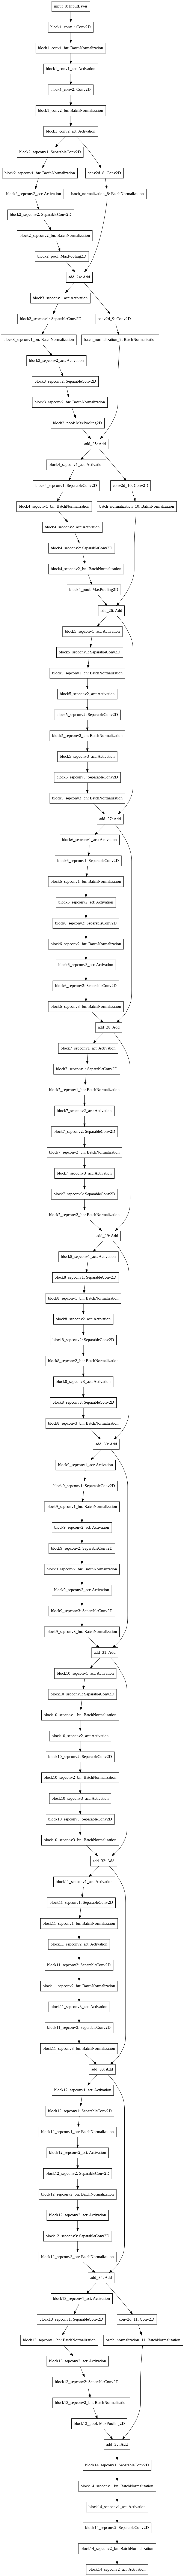

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(pretrained_base_model)

We can now create our new model. Different to [Sequential API](https://www.tensorflow.org/guide/keras/sequential_model), we are going to use [Functional API](https://www.tensorflow.org/guide/keras/functional). Sequential API make it simple to stack layers, from the input to output, no other way around. With Functional API, you can customize the flow of your model. 

Functional API is a preferrable model building API in tasks that take multiple inputs or give multiple outputs. A good example for these type of tasks is object detection, where you have to predict both the class of the object and the bounding boxes.

That was few notes about Sequential/Functional API. 

In [ ]:
# Define the input shape
inputs = tf.keras.Input(shape=(180, 180, 3))

# stack the inputs to pretrained model and set training to false
x = pretrained_base_model(inputs, training=False)

# Add a pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a dropout layer

x = tf.keras.layers.Dropout(0.5)(x)

# Last output dense layer with 1 unit. An activation function is not necessary since the predictions are already logit
output = tf.keras.layers.Dense(1)(x)

# Build a model
model = tf.keras.Model(inputs, output)

Here is a summary of the new model.

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 6, 6, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 2049      
Total params: 20,863,529
Trainable params: 2,049
Non-trainable params: 20,861,480
_________________________________________________________________


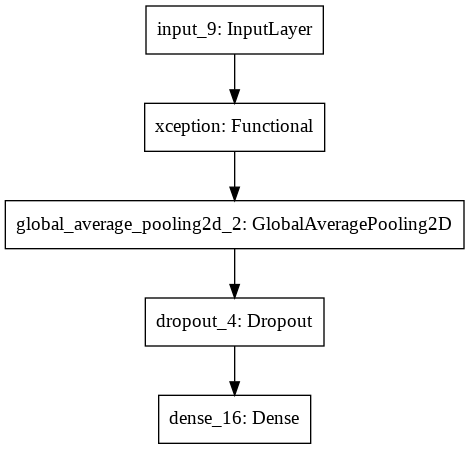

In [ ]:
plot_model(model)

<a name='4-4'></a>

## 4.4 Compiling and Training a New Model

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

batch_size = 20

train_steps = 2000/batch_size
val_steps = 1000/batch_size

history = model.fit(
      train_generator,
      steps_per_epoch=train_steps,  
      epochs=25,
      validation_data=val_generator,
      validation_steps=val_steps)

Epoch 1/25
100/100 [==============================] - 27s 238ms/step - loss: 0.2669 - accuracy: 0.8790 - val_loss: 0.0941 - val_accuracy: 0.9710
Epoch 2/25
100/100 [==============================] - 23s 229ms/step - loss: 0.1378 - accuracy: 0.9450 - val_loss: 0.0750 - val_accuracy: 0.9720
Epoch 3/25
100/100 [==============================] - 23s 229ms/step - loss: 0.1269 - accuracy: 0.9485 - val_loss: 0.0724 - val_accuracy: 0.9730
Epoch 4/25
100/100 [==============================] - 23s 229ms/step - loss: 0.1066 - accuracy: 0.9515 - val_loss: 0.0650 - val_accuracy: 0.9740
Epoch 5/25
100/100 [==============================] - 23s 229ms/step - loss: 0.1112 - accuracy: 0.9575 - val_loss: 0.0591 - val_accuracy: 0.9760
Epoch 6/25
100/100 [==============================] - 23s 228ms/step - loss: 0.0928 - accuracy: 0.9575 - val_loss: 0.0639 - val_accuracy: 0.9730
Epoch 7/25
100/100 [==============================] - 23s 229ms/step - loss: 0.1059 - accuracy: 0.9570 - val_loss: 0.0626 - val_ac

<a name='4-5'></a>

## 4.5 Visualizing the Results

In [ ]:
# function to plot accuracy & loss

def plot_acc_loss(history):

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = history.epoch

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc=0)

  # Create a new figure with plt.figure()
  plt.figure()

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc=0)
  plt.show()

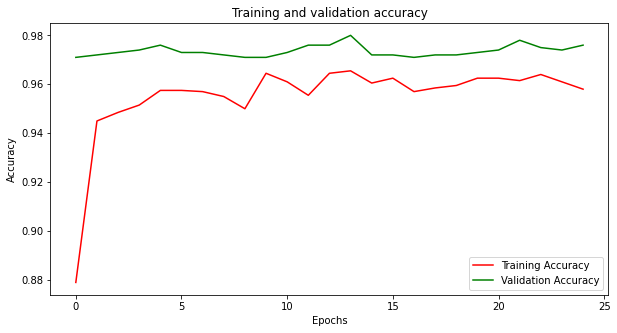

<Figure size 432x288 with 0 Axes>

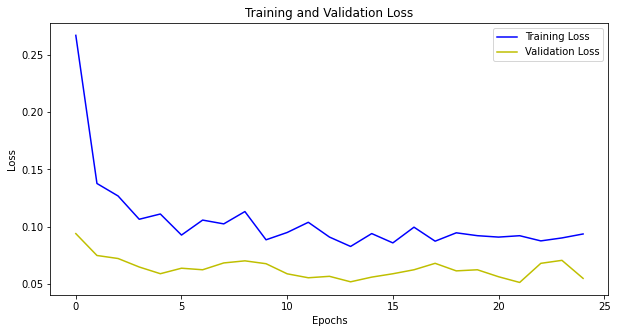

In [ ]:
plot_acc_loss(history)

It's pretty impressive how the new model did. Because the bottom layers had some learned weights (the advantages of using pretrained models), training accuracy started at 88% and val accuracy at 96. 

We could even achieve a great results by training for fewer epochs, maybe 10. 

Another point to make is that the validation metrics are good than training metrics. 

The reason why validation accuracy is better than training accuracy, or why validation loss is less than training loss, it's because the pretrained model has Batch Normalization and dropout layers. These regularization layers affects the accuracy during training, but they are turned off during validation.

Also, during the training, accuracy and loss are averaged per epoch, while during validation phase, accuracy and loss are computed on a model that has already trained longer.
You can notice this if you keep the eye on progress bar during the training. The training metrics change per step/epoch, and at the end of the epoch, the average loss/accuracy are reported. On the other hand, the validation metrics are computed after training on each epoch.



<a name='4-6'></a>

## 4.6 Finetuning the Model

All we did so far is to only train the new layers we added. 

In order to improve the performance, we can try to train some more top layers. That would mean unfreezing these them. 

Here is the reason: In any typical CNN architecture, the more the layers go to top, the more specialized they become on the task. The first layers (from the bottom) learns the low level features (lines, edges), but as the layers go up, they start to learn high level features that are specific to the task. Our pretrained model was trained on imagenet and it has 1000 classes. The high level features may mean things like faces, nose, ears, wings, etc...

That means we are better off using layers that are not very specialized on imagenet. 

Since we are going to retrain some part of the base model again, let's set it to trainable.

In [ ]:
pretrained_base_model.trainable = True

In [ ]:
# Define the input shape
inputs = tf.keras.Input(shape=(180, 180, 3))

# stack the inputs to pretrained model and set training to false
x = pretrained_base_model(inputs, training=False)

# Add a pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a dropout layer

x = tf.keras.layers.Dropout(0.5)(x)

# Last output dense layer with 1 unit. An activation function is not necessary since the predictions are already logit
output = tf.keras.layers.Dense(1)(x)

# Build a model
model = tf.keras.Model(inputs, output)

In [ ]:
# Number of layers in pretrained model

len(pretrained_base_model.layers)

132

Now, we are going to freeze the first 100 layers(from the bottom/input of the pretrained model), and we will train the remaining 32 layers. 

In [ ]:
# Freeze the first 100 layers 

for layer in pretrained_base_model.layers[:100]:

  layer.trainable = False

We can now compile the model again. But this time, we will use low learning rate. 

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

And we will train for 10 epochs. I have noticed that it doesn't make difference to specify training and validation steps since the data are already in batches (per augmentation). 

In [ ]:
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=val_generator)

Epoch 1/10
100/100 [==============================] - 26s 238ms/step - loss: 0.4879 - accuracy: 0.7450 - val_loss: 0.1716 - val_accuracy: 0.9560
Epoch 2/10
100/100 [==============================] - 23s 233ms/step - loss: 0.1632 - accuracy: 0.9310 - val_loss: 0.0747 - val_accuracy: 0.9780
Epoch 3/10
100/100 [==============================] - 23s 232ms/step - loss: 0.1069 - accuracy: 0.9580 - val_loss: 0.0528 - val_accuracy: 0.9810
Epoch 4/10
100/100 [==============================] - 23s 233ms/step - loss: 0.0882 - accuracy: 0.9625 - val_loss: 0.0525 - val_accuracy: 0.9840
Epoch 5/10
100/100 [==============================] - 23s 233ms/step - loss: 0.0946 - accuracy: 0.9615 - val_loss: 0.0453 - val_accuracy: 0.9810
Epoch 6/10
100/100 [==============================] - 23s 234ms/step - loss: 0.0723 - accuracy: 0.9685 - val_loss: 0.0458 - val_accuracy: 0.9820
Epoch 7/10
100/100 [==============================] - 23s 234ms/step - loss: 0.0668 - accuracy: 0.9730 - val_loss: 0.0436 - val_ac

<a name='4-7'></a>

## 4.7 Vizualizing the Results Again

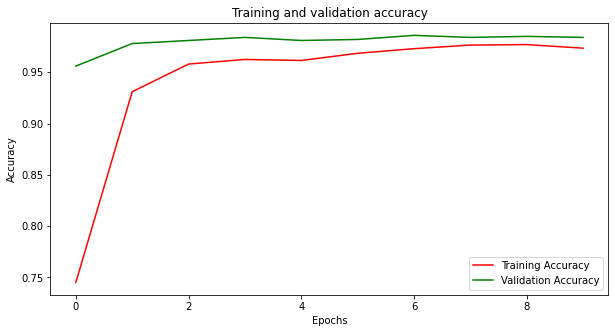

<Figure size 432x288 with 0 Axes>

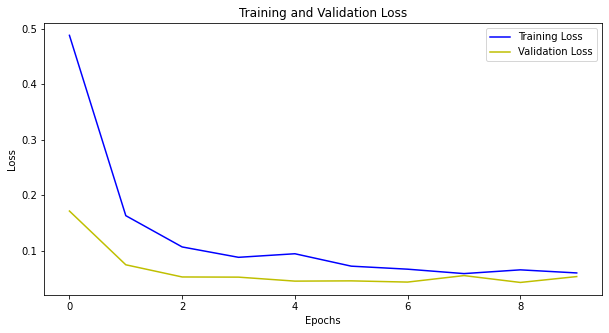

In [ ]:
plot_acc_loss(history)

This is very much better. And seems we are not overfitting. There is no significant increase in accuracy but the learning curve is much smoother. 

<a name='5'></a>

## 5. Image Classification and Transfer Learning with TensorFlow Hub

TensorFlow [Hub](https://www.tensorflow.org/hub) is a repository of trained and ready to use machine learning models. 

You can use them as they are or finetune them. TF Hub contain so many models in computer vision and natural language processing. 

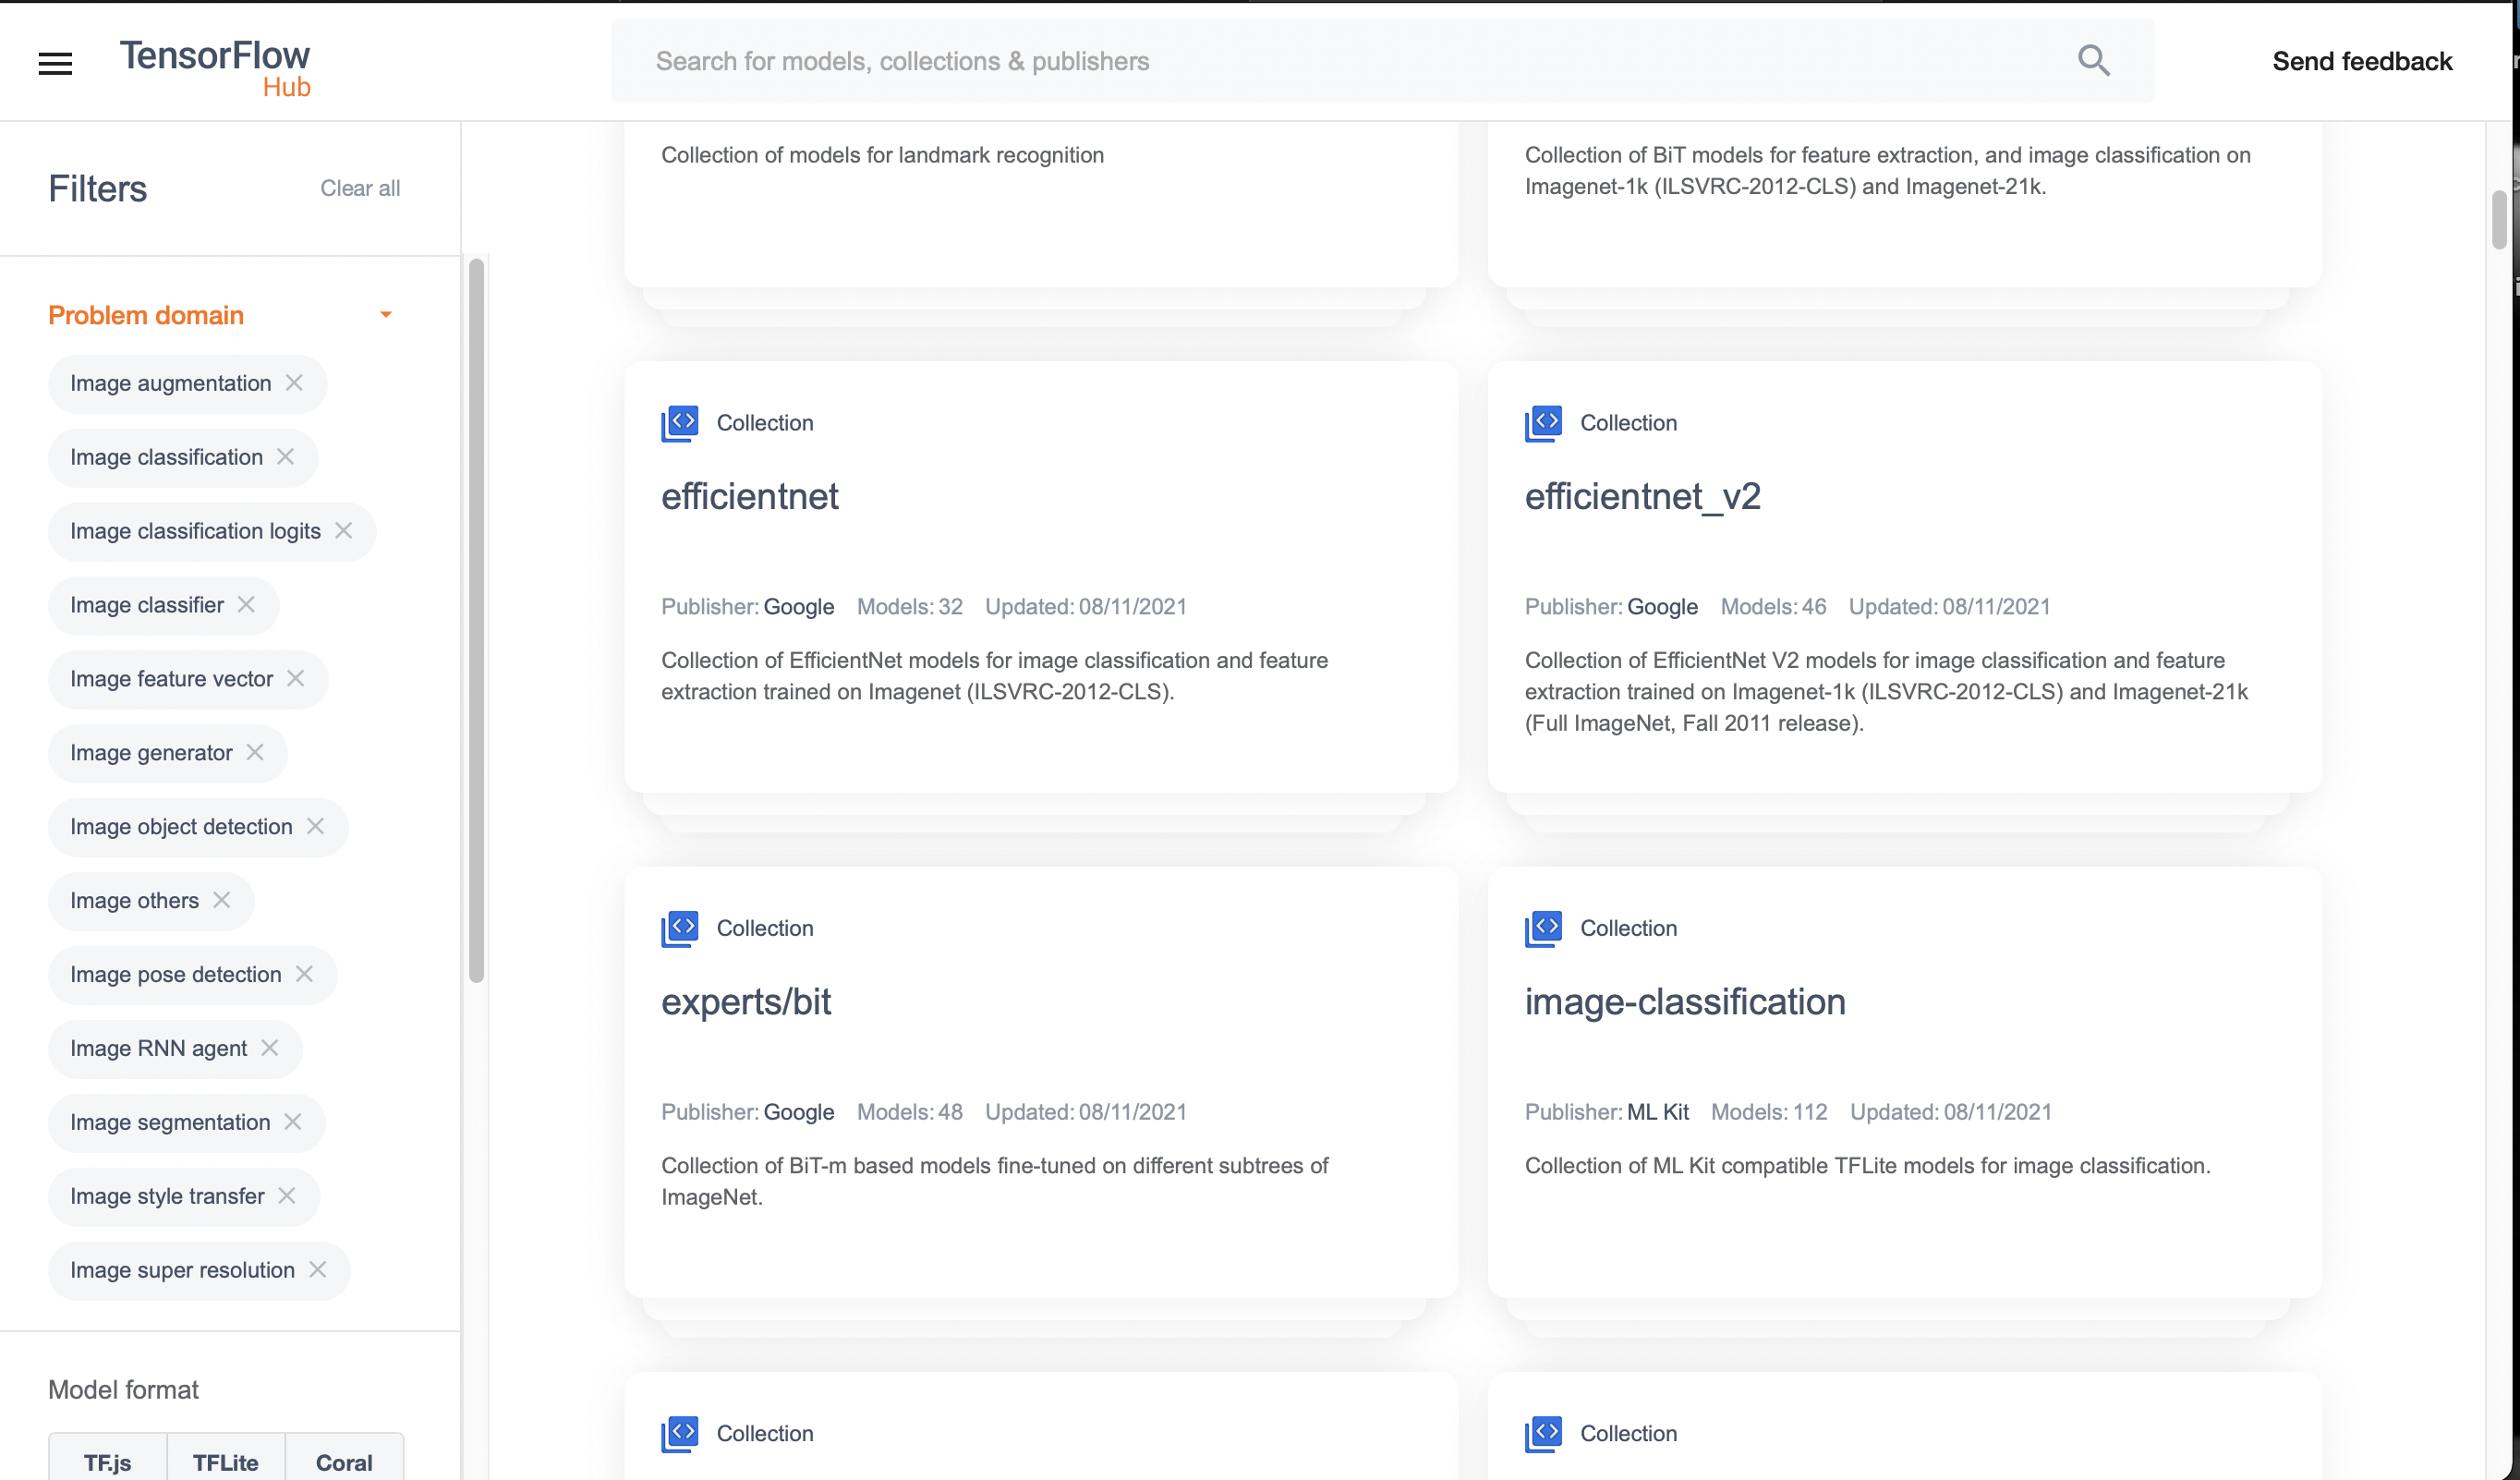

<a name='5-1'></a>

## 5.1 Image Classification with TensorFlow Hub

The fact that all models in TF Hub are trained, it means that you can use them in things like image classification without having to do anything, other than loading a model, and preprocessing an image. 

Beyond downloading an image, TensorFlow Team even took a step further. You can upload your image in a browser, and get a great (or close to) prediction. You can try it [here](https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5)

How cool is that! 

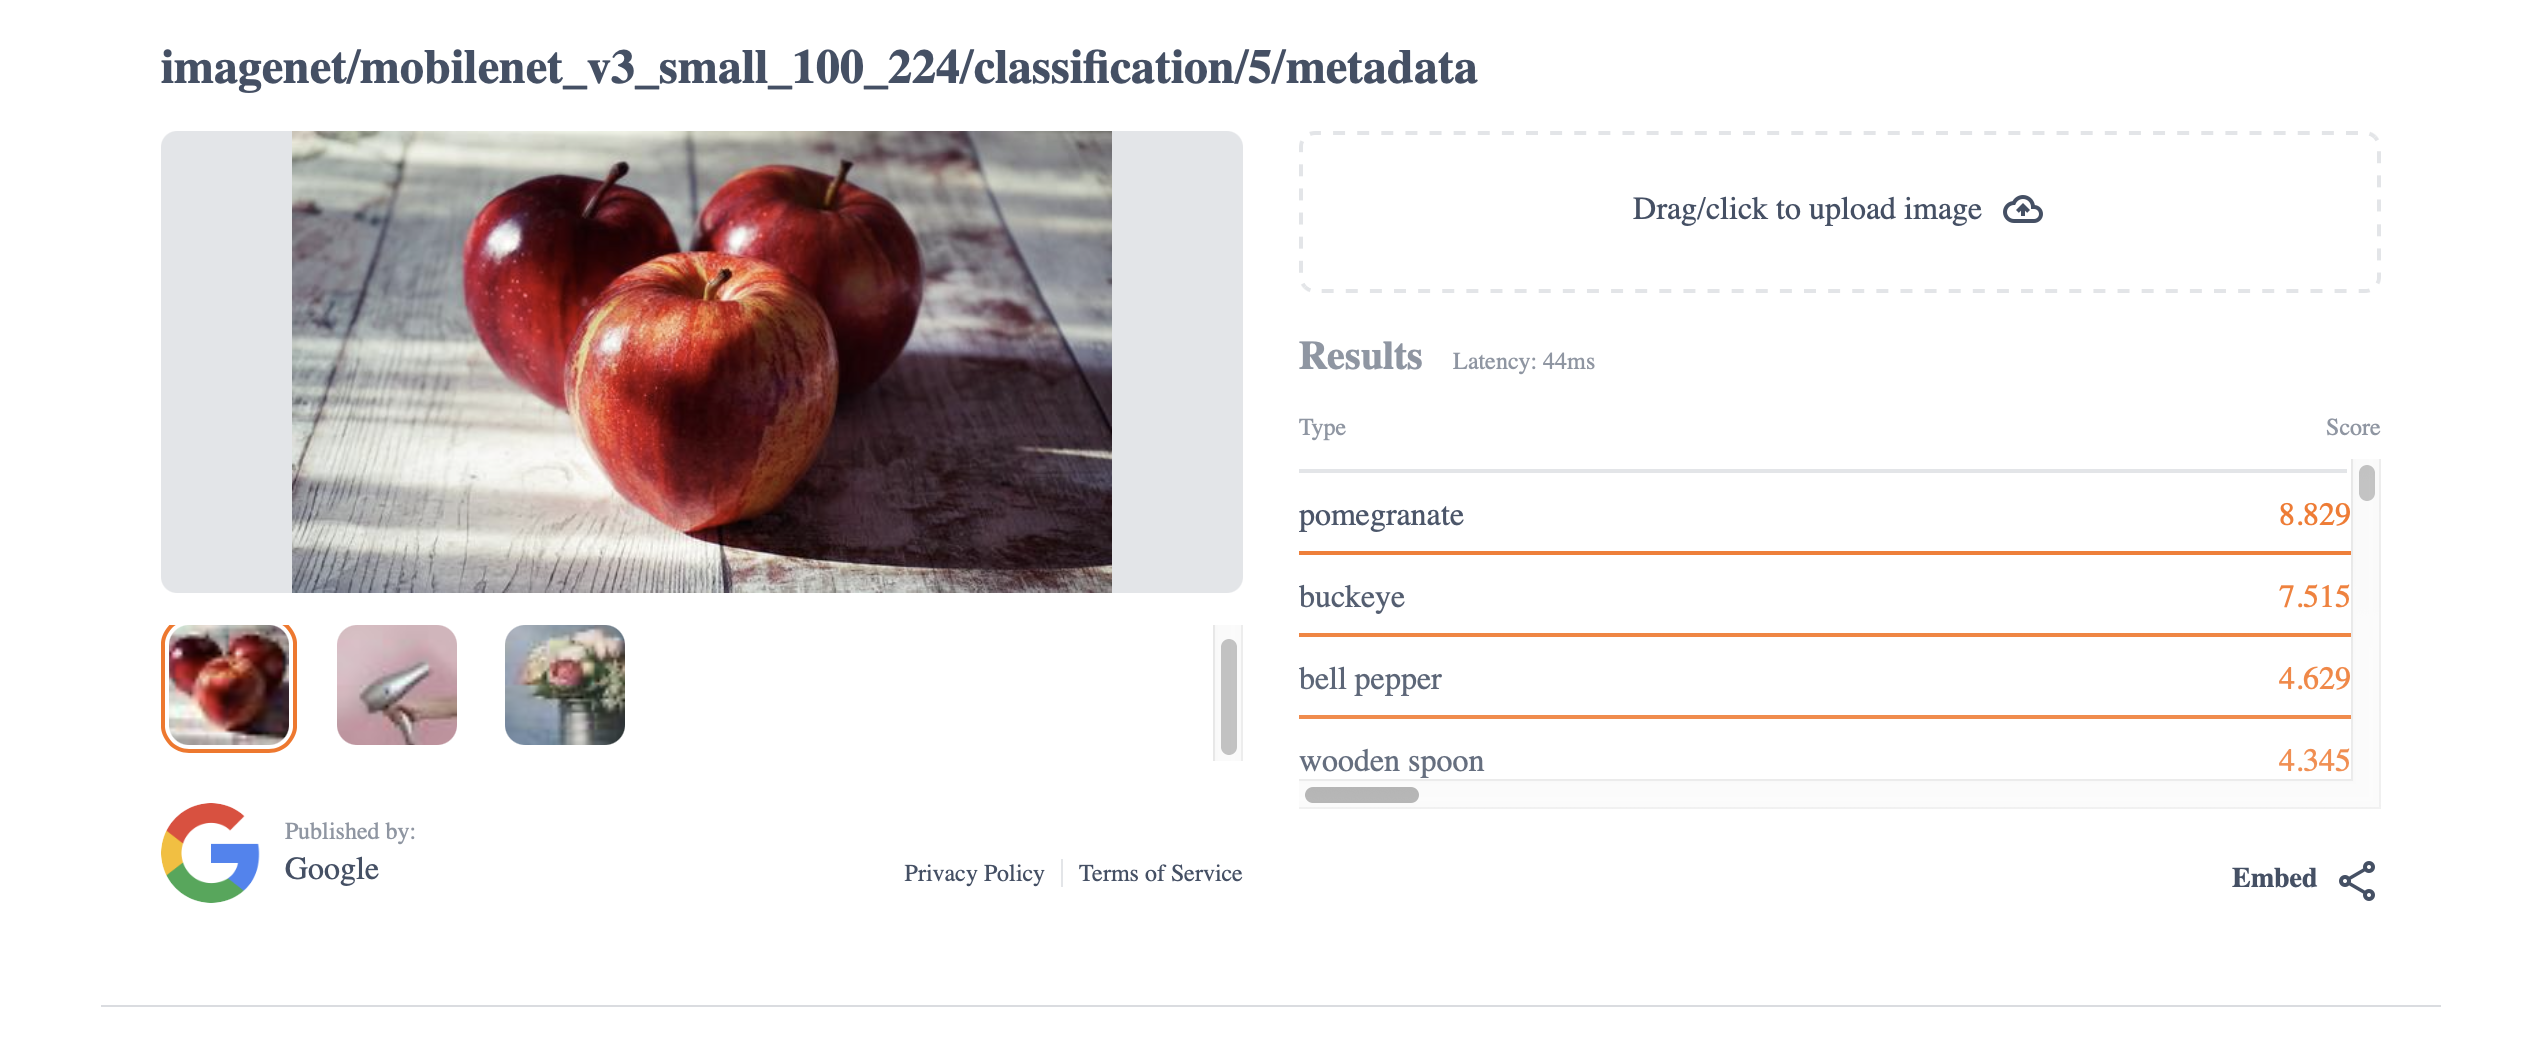

Let's practice this art! We will start loading the pretrained model from TensorFlow Hub. 

But we are also going to import it first.

In [ ]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

<a name='5-1-1'></a>

#### 5.1.1 Getting a Pretrained Model


In this quest of image classification with TF Hub, we will use MobileNetV3. 

[MobileNetV3] is a CNN type architecture built for performing efficient on-device image classification. It's not limited to classification, it can also be used for things like object detection and image segmentation.

The next time you want to deploy an image classifier in a mobile device with a latency and performance tradeoff, consider MobileNet models. 

We will use a small version of MobileNet, but there is a [large version](https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5) for high resources applications. 

In [ ]:
# Getting the model from Hub

model_url = 'https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5'

classifier = hub.load(model_url)

I find it cool to just get the whole trained model with one line of code, it's basically like downloading an image from the internet.

<a name='5-1-2'></a>

#### 5.1.2 Getting and Preparing Image

The model expect the image to have the size of (224,224,3). Let's download an image and preprocess it accordingly.

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import get_file

def get_preprocess_image(image_name, image_url):

  ''' Download an image and return preprocessed image'''

  image = get_file(image_name, image_url)
  image = load_img(image, target_size=(224,224))
  image = img_to_array(image)
  image = image/255.0
  image = tf.expand_dims(image, 0)
  
  return image


In [ ]:
# Image url

bus = 'https://upload.wikimedia.org/wikipedia/commons/6/63/LT_471_%28LTZ_1471%29_Arriva_London_New_Routemaster_%2819522859218%29.jpg'
tiger = 'https://upload.wikimedia.org/wikipedia/commons/b/b0/Bengal_tiger_%28Panthera_tigris_tigris%29_female_3_crop.jpg'
cat = 'https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg'
car = 'https://upload.wikimedia.org/wikipedia/commons/4/49/2013-2016_Toyota_Corolla_%28ZRE172R%29_SX_sedan_%282018-09-17%29_01.jpg'
dog = 'https://upload.wikimedia.org/wikipedia/commons/archive/a/a9/20090914031557%21Saluki_dog_breed.jpg'
    

# Get and preprocess image

image = get_preprocess_image('dog', dog)

98304/92403 [===============================] - 0s 0us/step


In [ ]:
# Get shape of the image 

image.shape

TensorShape([1, 224, 224, 3])

<a name='5-1-3'></a>

#### 5.1.3 Running a Classifier on Image

In [ ]:
# Making predictions

predictions = tf.nn.softmax(classifier(image))

# Predictions to numpy array 

predictions = predictions.numpy()
predictions[:5]

array([[2.4638965e-04, 4.2892159e-05, 2.0482648e-05, ..., 1.6945155e-04,
        3.4929760e-04, 3.1921579e-04]], dtype=float32)

Pretty cool, right? Now we finished predicting the image and we have predictions. It doesn't make sense though. 

Let'd download the class names. MobileNet V3 was trained on imagenet which has 1000 classes, but because there is additional background class, the total number of classes is 1001. 

Let's download the classes file and since the downloaded file is a text type, let's convert it into a list. So, we are going to get a list of all classes.

In [ ]:
classes_file = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'

class_names_file = get_file('classes',classes_file)

# Read file

file = open(class_names_file,'r')

# Get a list of class names

classes =  [label.strip() for label in file.readlines()]

file.close()

# Remove the class of background which is at index 0. It is not included in predictions

classes = classes[1:]

# Display top 5 classes (by index)
len(classes)

16384/10484 [==============================================] - 0s 0us/step


1000

Pretty cool. Let's use class names along with the predictions of the image we got. We will remove the irst

In [ ]:
# Get top 5 predictions

top_5_preds = tf.argsort(predictions, axis=-1, direction='DESCENDING')[0][:5].numpy()

for i, item in enumerate(top_5_preds):
  print(f"Class index: {item}, Class name:{str(classes[item])}, Probability: {predictions[0][top_5_preds][i]}")

Class index: 237, Class name:miniature pinscher, Probability: 0.21660539507865906
Class index: 177, Class name:Scottish deerhound, Probability: 0.20602409541606903
Class index: 215, Class name:Brittany spaniel, Probability: 0.1984827220439911
Class index: 166, Class name:Walker hound, Probability: 0.04971792921423912
Class index: 235, Class name:German shepherd, Probability: 0.048075418919324875


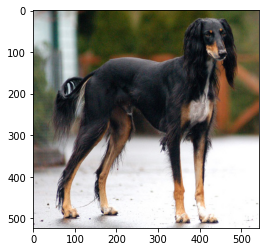

In [ ]:
# display image

plt.imshow(load_img(get_file('dog',dog)))

<a name='5-1-4'></a>

#### 5.1.4 Wrapping Up A TF Hub Model Into a Keras Layer

Another interesting thing about TF hub models is that they can be wrapped in Keras layer. 

In [ ]:
mobilenet_large = 'https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5'

clf_model = tf.keras.Sequential([
       hub.KerasLayer(mobilenet_large, input_shape=(224,224,3))                          

])

Now you can make predictions on images as usual with Keras models. 

In [ ]:
# Get and preprocess an image

image = get_preprocess_image('cat', cat)

2834432/2833605 [==============================] - 0s 0us/step


In [ ]:
preds = clf_model.predict(image)

In [ ]:
# Get the top class with tf.argmax() or np.argmax()

predicted_class = tf.argmax(preds[0], axis=-1)

# Get predicted class name from imagenet labels

predicted_class_name = classes[predicted_class]
predicted_class_name

'Persian cat'

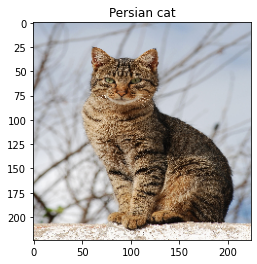

In [ ]:
#Plot image and predicted class name

plt.imshow(np.reshape(image, (224,224,3)))
plt.title(predicted_class_name);

<a name='5-2'></a>

## 5.2 Building a Custom Classifier with TF Hub

TensorFlow Hub contains many models that are trained and ready to be used. 

Some of the available pretrained models can be used for direct classification without having to add anything. Just like we did above, we can either use these models by loading them or we can wrap them in keras layer. 

In this final section, let's do something different, and also, let's take a different dataset: We are going to customize TF Hub models on flower datasets. 

`tf_flower` dataset is a large set of image of flowers.  

By the end, you will have learned to work with tensorflow datasets and how to reuse pretrained models on new data (transfer learning). 




<a name='5-2-1'></a>

#### 5.2.1 Getting and Preparing Data

Let's load `tf_flowers` dataset from TensorFlow datasets. As we load the data, we will split it into train, test, and validation sets. 

There are 3670 images. Training set will take 80% of the dataset, and validation set 20%. Instead of reserving a test set, we will test the model on the internet images. 

In [ ]:
# Loading the data from tensorflow datasets

(train_data, val_data), flower_info = tfds.load('tf_flowers',
                                              split=['train[:80%]', 'train[80%:]'],
                                              with_info=True,
                                              as_supervised=True,
                                              shuffle_files=True
)


local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


Now that the data is downloaded, we can see the number of images in each set.

In [ ]:
# Number of images in train, test, val
total_images = flower_info.splits['train'].num_examples # there is orginally one split ['train']


print(f'Total number of images: {total_images}')
print(f'The number of images in training set: {len(train_data)}')
print(f'The number of images in validation set set: {len(val_data)}')

Total number of images: 3670
The number of images in training set: 2936
The number of images in validation set set: 734


And we can also see the classes or categories we have.

In [ ]:
cat_names = flower_info.features['label'].names

print(f'Categories of flowers: {cat_names}\n Number of categories: {len(cat_names)}')

Categories of flowers: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
 Number of categories: 5


##### Looking into Data

As always, it's best to visualize the data. 

For simplicity, we can first display some images using [`tfds.visualization.show_examples`](https://www.tensorflow.org/datasets/api_docs/python/tfds/visualization/show_examples)

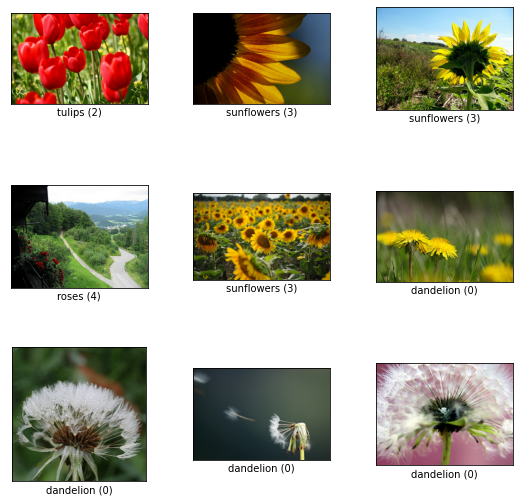

In [ ]:
plot_images = tfds.show_examples(train_data, flower_info)

If you want to look more, you can use Matplotlib to plot the images. Let's do it because we will use it later when visualizing the augmented images. 

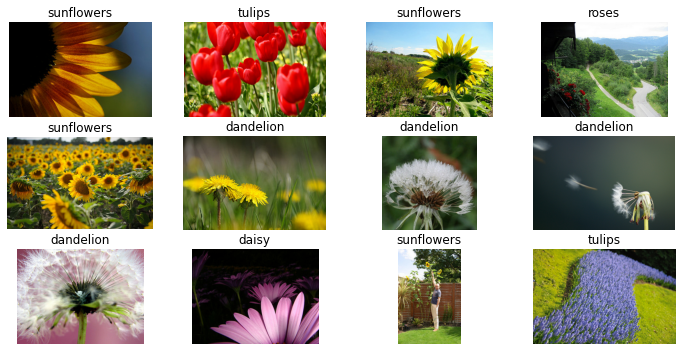

In [ ]:
plt.figure(figsize=(12,8))

index = 0

for image, label in train_data.take(12):
  
  index += 1
  plt.subplot(4,4,index)
  plt.imshow(image)
  plt.title(cat_names[label])
  plt.axis('off')


Now that we loaded and looked into the data, it's time to do some little preprocessing. We are going to normalize the images and we will also resize images to have (224, 224). 

Keras has [experimental preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) that we can use either inside the model (take advantage of GPU) or use outside the model. 

In [ ]:
def preprocess(image, label):

  image = tf.cast(image, tf.float32)/255.0
  image = tf.image.resize(image, (224,224))

  return image, label

Now, we can apply the above function to the dataset with [map function](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map). We will also shuffle it, and batch the images.
We do not shuffle the validation set.

In [ ]:
def train_prep(data, shuffle_size, batch_size):

  data = data.map(preprocess)
  data = data.cache()
  data = data.shuffle(shuffle_size).repeat()
  data = data.batch(batch_size)
  data = data.prefetch(1)

  return data

In [ ]:
def val_prep(data, batch_size):

  data = data.map(preprocess)
  data = data.batch(batch_size)
  data = data.cache()
  data = data.prefetch(1)

  return data

In [ ]:
train_ds = train_prep(train_data, 1000, 32)
val_ds = val_prep(val_data, 32)

Let's verify if our images are resized to (224,224) and if the pixel values are scaled to be in the range of 0 and 1. 

In [ ]:
for image,label in train_ds.take(1):
  print(f'Images shape(Batch size, width, height, color channel):{image.shape}')
  print(f'The label of the first image in batch: {label[0]}')
  print(image[0,0:2])
  
  break

Images shape(Batch size, width, height, color channel):(32, 224, 224, 3)
The label of the first image in batch: 1
tf.Tensor(
[[[0.3452381  0.3805322  0.11778712]
  [0.3480567  0.38335082 0.12060574]
  [0.351243   0.3865371  0.12379202]
  ...
  [0.28811276 0.32340688 0.09987745]
  [0.2901961  0.3254902  0.10196079]
  [0.2901961  0.3254902  0.10196079]]

 [[0.34985995 0.38557422 0.1219888 ]
  [0.35267857 0.38839284 0.12480742]
  [0.35586485 0.39157912 0.1279937 ]
  ...
  [0.2879158  0.3232099  0.0996805 ]
  [0.2898941  0.32518822 0.10165879]
  [0.2901961  0.3254902  0.10196079]]], shape=(2, 224, 3), dtype=float32)


As you can see, everything is cool now. All images are resized to (224,224), rescaled to (0,1). 

Now we can follow with creating new model from a pretrained model.

<a name='5-2-2'></a>

#### 5.2.2 Creating a New Model from a Pretrained Model

In this section, we will load a pretrained model from TensorFlow hub. 

There is something different to what we have done in previous sections. 

Instead of using a whole model trained on imagenet, we will take a model without classification layers (normally called fully connected layers) and add our own classification layer that is relevant to the task we are doing of classifying flowers. 

If you remember, with normal pretrained models available in [Keras applications](https://keras.io/api/applications/), we would have to set `include_top` to `False` in order to use the pretrained model as a feature extractor without an imagenet classification layers. 

Fortunately, TensorFlow Hub contains feature extractors, so we don't have to worry getting the rid of the top layers. 

In TensorFlow Hub, the pretrained models that are used for feature extractions are very clear looking in the their model handle. Take an example: 

**MobilenetV3 Large Feature Extractor**: https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5

**MobileNetV3 Large Classification**: https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/classification/5

Now that we understand the essence of TF Hub models, let's get a MobileNetv3 feature extractor. Any feature extractor from TF Hub can work here. 

We will then stack it in [KerasLayer](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer), and make sure it is not trainable. We will only train the classification layer that we will add later.

In [ ]:
model_handle = 'https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5'

feature_extractor = hub.KerasLayer(
    model_handle,
    input_shape = (224,224,3),
    trainable = False
)

We are now going to add a classification layer. Our flower dataset has 5 classes, so we will have 5 units.

In [ ]:
flower_classifier = tf.keras.Sequential([
     # MobileNetv3 Feature Extractor

     feature_extractor,

     # Classification layer, activation function is not necessary
     tf.keras.layers.Dense(5)                     

])

We can see the model summary

In [ ]:
flower_classifier.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1280)              2731616   
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 6405      
Total params: 2,738,021
Trainable params: 6,405
Non-trainable params: 2,731,616
_________________________________________________________________


<a name='5-2-3'></a>

#### 5.2.3 Compiling and Training a New Model

After we have created the model, the next step is always to compile it. 

In model compilation, it's where we specify the loss, optimizer, and performance metric that we want to track during the training. 

Loss function is there to measure the distance between the prediction and actual output, and optimizer is for minimizing such loss. There are a whole maths behind it, but that's the idea. 

We are going to train the new model we created from a pretrained feature extractor. That's means fitting it on the data. 

In [ ]:
# Compiling the model 

flower_classifier.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.02),
    metrics=['accuracy']

)

In [ ]:
batch_size = 32
train_steps = int(len(train_data)/batch_size)
val_steps = int(len(val_data)/batch_size)


history_flower = flower_classifier.fit(
      train_ds,
      steps_per_epoch=train_steps,
      validation_data=val_ds,
      validation_steps=val_steps,
      epochs=15
)

Epoch 1/15
91/91 [==============================] - 8s 46ms/step - loss: 0.7611 - accuracy: 0.7630 - val_loss: 0.4764 - val_accuracy: 0.8622
Epoch 2/15
91/91 [==============================] - 4s 39ms/step - loss: 0.4201 - accuracy: 0.8777 - val_loss: 0.3772 - val_accuracy: 0.8807
Epoch 3/15
91/91 [==============================] - 4s 40ms/step - loss: 0.3445 - accuracy: 0.9011 - val_loss: 0.3353 - val_accuracy: 0.8949
Epoch 4/15
91/91 [==============================] - 4s 39ms/step - loss: 0.2983 - accuracy: 0.9121 - val_loss: 0.3095 - val_accuracy: 0.8977
Epoch 5/15
91/91 [==============================] - 4s 39ms/step - loss: 0.2719 - accuracy: 0.9207 - val_loss: 0.2936 - val_accuracy: 0.9048
Epoch 6/15
91/91 [==============================] - 4s 39ms/step - loss: 0.2486 - accuracy: 0.9275 - val_loss: 0.2812 - val_accuracy: 0.9048
Epoch 7/15
91/91 [==============================] - 4s 40ms/step - loss: 0.2282 - accuracy: 0.9334 - val_loss: 0.2725 - val_accuracy: 0.9091
Epoch 8/15
91

Now that the model is trained, let's plot the results with the function that we created earlier: `plot_acc_loss(history)`.

<a name='5-2-4'></a>

#### 5.2.4 Visualizing the Results

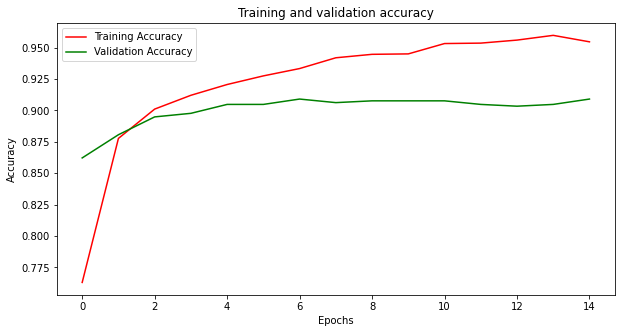

<Figure size 432x288 with 0 Axes>

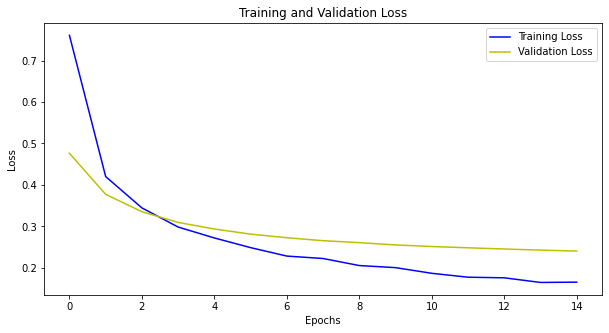

In [ ]:
plot_acc_loss(history_flower)

As it seems, there is a clear difference between training metrics and validation metrics. 

This is a sign of overfitting. A prominent way of avoiding overfitting is to add more data. Since the mere goal of this lab was to learn how to use TensorFlow Hub, we will leave that here. 

<a name='5-2-5'></a>

#### 5.2.5 Testing a Model on New Internet Images

In [ ]:
def test_model(model, image_url, image_name):

  '''Take a model, image url, image_name, 
     preprocess the image (resize, rescale),
     Predict the class of the image,
     And return the class of the image
     '''

  image = tf.keras.utils.get_file(image_name, image_url)
  image = tf.keras.preprocessing.image.load_img(image, target_size=(224,224))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = image/255.0
  image = tf.expand_dims(image, 0)

  # predict an image

  pred = model.predict(image)

  im_class = tf.argmax(pred[0],axis=-1)

  return im_class

In [ ]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/f/f9/Tulip_cv._04.JPG'

predicted_class = test_model(flower_classifier, image_url, 'im_name')
print(predicted_class)

tf.Tensor(2, shape=(), dtype=int64)


The predicted class is 2. Let's look into the names of the categories to see the name of the predicted class. 

In [ ]:
print(f'Predicted class: {predicted_class} \nPredicted flower name: {cat_names[predicted_class]}')

Predicted class: 2 
Predicted flower name: tulips


It seems that tulip is the predicted class. Let's plot the image to image to verify the name. 

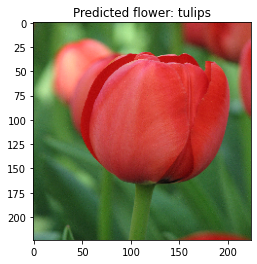

In [ ]:
plt.imshow(load_img(get_file('image', image_url), target_size=(224,224)))
plt.title(f'Predicted flower: {cat_names[predicted_class]}');

This is the end of the notebook. This notebook was about using pretrained models and transfer learning using pretrained models available in Keras application and TensorFlow Hub.

<a name='5-2-6'></a>

#### 5.2.6 Further Learning

The following are the most recommended courses to learn more about machine learning basics and computer vision

* [Google Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course) for foundations of Machine Learning

* [Intro to Deep Learning MIT (Lecture 1 and 3)](http://introtodeeplearning.com) for quick foundations of Deep Learning and Deep Computer Vision

* [Stanford CS321n Computer Vision Class](https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ&index=2): Very amazing course. 

* [Deep Learning Specialization, Andrew Ng](https://www.deeplearning.ai/program/deep-learning-specialization/). This is a great course to give you indepth foundations of Deep Learning. [Free on YouTube](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF). 

* [Fast.AI Practical Deep Learning for Coders](https://course.fast.ai). This is the best in class course (very practical and has a high community ratings). 